<a href="https://colab.research.google.com/github/tomarforever86/CNN/blob/main/CNN_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline      
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

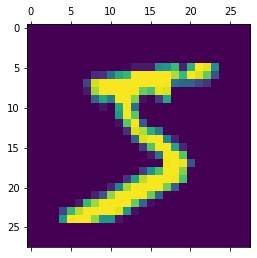

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1244 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9846


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9761


[0.0750514343380928, 0.9761000275611877]

Text(69.0, 0.5, 'Truth')

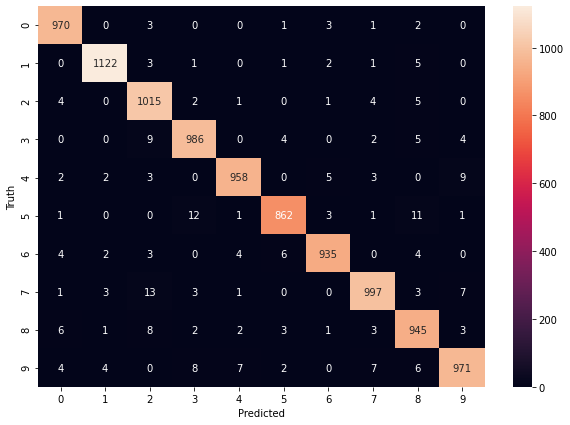

In [15]:
import seaborn as sn

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0336 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0233 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020